# PedSilicoICH: Part 1. Phantoms

This notebook introduces the `Phantom` Class

In [1]:
%pip install --upgrade pip -q
%pip install matplotlib -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt

from utils import create_circle_phantom

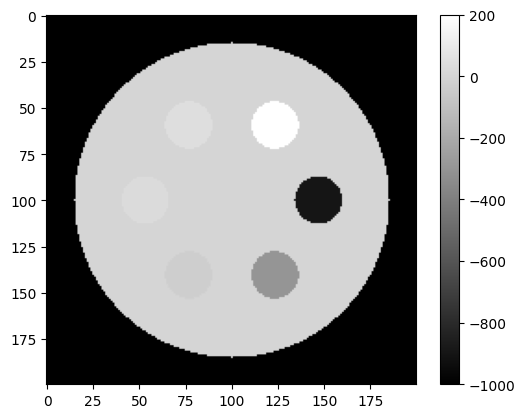

In [3]:
circles = [-900, -300, -30, 30, 45, 200]
img = create_circle_phantom(image_size=200,
                            large_circle_value=0,
                            bg_value=-1000,
                            small_circle_values=circles,
                            num_small_circles=len(circles))
plt.imshow(img, cmap='gray')
plt.colorbar()

In [4]:
from VITools import Phantom, Scanner

In [5]:
Phantom?

Init signature:
Phantom(
    img: numpy.ndarray,
    spacings: tuple = (1, 1, 1),
    patient_name: str = 'default',
    patientid: int = 0,
    age: float = 0,
) -> None
Docstring:     
A base phantom that accepts any image array and spacings to define its size.

:param img: numpy.ndarray, 2D or 3D, defining the phantom
:param spacings: tuple, voxel spacings [mm] (z, x, y).
                Default is 1 mm in each direction.
:param patient_name: str, patient identifier to be saved in DICOM header.
                    Default is 'default'.
:param patientid: int, patient identifier to be saved in DICOM header.
                 Default is 0.
:param age: float, patient age in years to be saved in DICOM header.
            Default is 0.
File:           ~/Dev/VITools/src/VITools/phantoms.py
Type:           type
Subclasses:     LesionPhantom

Let's assume this phantom is 200 mm deep, by 200 mm in diameter, we can specify this with a 2D image with the following spacings:

In [6]:
phantom = Phantom(img[None], spacings=(200, 1, 1))
phantom


        Phantom Class: Phantom
        Age (years): 0
        Shape (voxels): [1, 200, 200]
        Size (mm): [200 200 200]
        

In [7]:
from VITools.pipeline import load_phantom

In [8]:
Scanner?

Init signature:
Scanner(
    phantom: VITools.phantoms.Phantom,
    scanner_model: str = 'Scanner_Default',
    studyname: str = 'default',
    studyid: int = 0,
    seriesname: str = 'default',
    seriesid=0,
    framework: str = 'CATSIM',
    output_dir: str | pathlib.Path = None,
    materials: dict | None = None,
) -> None
Docstring:      A class to hold CT simulation data and run simulations
Init docstring:
:param phantom: Phantom class instance to be scanned, voxels in units of
    approximate CT Numbers [HU], typically in python
    coordinates (z, x, y)
    where z is perpendicular to the axial plane made by x and y.
    See <https://en.wikipedia.org/wiki/Hounsfield_scale>
    for some suggested values for common materials
:param scanner_model: str, study identifier to be used for virtual identifier and DICOM header
:param studyname: str, study identifier to be saved in DICOM header
:param studyid: int, study identifier to be saved in DICOM header
:param seriesname: str, serie

In [9]:
scanner = Scanner(phantom)
scanner

Initializing Scanner object...
----------
*
*********************************************
* DICOM dataset information:
* Patient age: 000Y, sex: O
* Scanner: GE MEDICAL SYSTEMS RHAPSODE
* Study date & desciption: 20040119, e+1
* Technique: 120 kVp, 170 mA
* Reconstruction: STANDARD kernel, 338.671600-mm FOV
* Image: 1.0-mm pixels (XY), 200.0-mm slices (Z)
*********************************************
*
*********************************************
* Segmentation parameters:
* Using thresholds specified in the config file.
* Materials: ['ncat_adipose', 'ncat_water', 'ncat_brain', 'ncat_skull']
* mu values (/cm): [0.18, 0.21, 0.21, 0.46]
* mu(water) (/cm): 0.21
* Thresholds (/cm): [0.16, 0.2, 0.21, 0.27]
* Thresholds (HU): [-200.0, -10.0, 10.0, 300.0]
*********************************************
* Calculating volume fraction maps for 4 materials and 1 slices...
* Writing volume fraction files for 4 materials and 1 slices, plus the HU data...
* Writing /tmp/tmp84c18k79/default/phantoms/0


        <class 'VITools.image_acquisition.Scanner'> default
        Scanner: Scanner_Default
        Simulation Platform: CATSIM
        

While this dataset has CT simulations from another framework (MIRT), let's just use the ground truth images

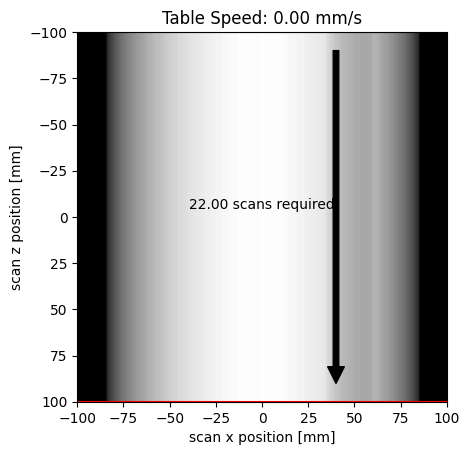

In [10]:
scanner.scout_view()